## EDA

In [8]:
import pandas as pd

# Load the dataset
file_path = 'Final_Merged_Patient_Data.csv'
data = pd.read_csv(file_path)

# Show the first few rows and dataset info
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15695 entries, 0 to 15694
Data columns (total 51 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Date                                                    15695 non-null  object 
 1   CGM (mg / dl)                                           15695 non-null  float64
 2   CBG (mg / dl)                                           9255 non-null   float64
 3   Blood Ketone (mmol / L)                                 8242 non-null   float64
 4   Dietary intake                                          223 non-null    object 
 5   饮食                                                      9204 non-null   object 
 6   Insulin dose - s.c.                                     7736 non-null   object 
 7   Non-insulin hypoglycemic agents                         8543 non-null   object 
 8   CSII - bolus insulin (Novolin R, IU)

(None,
                   Date  CGM (mg / dl)  CBG (mg / dl)  Blood Ketone (mmol / L)  \
 0  2021-07-30 16:43:00          113.4       0.173858                      NaN   
 1  2021-07-30 16:58:00          124.2       0.173858                      NaN   
 2  2021-07-30 17:13:00          129.6       0.173858                      NaN   
 3  2021-07-30 17:28:00          142.2       0.173858                      NaN   
 4  2021-07-30 17:43:00          156.6       0.173858                      NaN   
 
   Dietary intake   饮食 Insulin dose - s.c. Non-insulin hypoglycemic agents  \
 0            NaN  NaN                 NaN                             NaN   
 1            NaN  NaN                 NaN                             NaN   
 2            NaN  未记录                 NaN                             NaN   
 3            NaN  未记录                 NaN                             NaN   
 4            NaN  未记录                 NaN                             NaN   
 
   CSII - bolus insulin (Novo

In [9]:
# Check for missing data
missing_data = data.isnull().sum()

# Basic statistics for numerical features
numerical_data = data.select_dtypes(include=['float64', 'int64'])
data_stats = numerical_data.describe()

missing_data.head(10), data_stats.head(10)

(Date                                            0
 CGM (mg / dl)                                   0
 CBG (mg / dl)                                6440
 Blood Ketone (mmol / L)                      7453
 Dietary intake                              15472
 饮食                                           6491
 Insulin dose - s.c.                          7959
 Non-insulin hypoglycemic agents              7152
 CSII - bolus insulin (Novolin R, IU)         6644
 CSII - basal insulin (Novolin R, IU / H)     6593
 dtype: int64,
        CGM (mg / dl)  CBG (mg / dl)  Blood Ketone (mmol / L)  \
 count   15695.000000    9255.000000              8242.000000   
 mean      164.753845       5.995138                 0.157741   
 std        72.309923      36.813114                 0.171098   
 min        39.600000      -3.134203                 0.100000   
 25%       108.000000      -0.785155                 0.100000   
 50%       156.600000       0.099727                 0.100000   
 75%       214.20000

Missing Data Summary: 
Columns with a lot of missing values:

Dietary intake: 15,472 missing entries (mostly empty).
血饮食 (Chinese for dietary info): 6,491 missing entries.
Insulin and hypoglycemic agent data: Many insulin-related columns, such as "Insulin dose - s.c." and "CSII - bolus insulin," have thousands of missing entries.
Blood Ketone levels: 7,453 missing values.
CBG (mg/dl): 6,440 missing values.
Non-null data: Some critical columns like CGM, Age, Height, and Weight have more complete data (around 8,983 non-null entries).

In [10]:
# Convert 'Datetime' column to datetime type and sort the data by it
data['Datetime'] = pd.to_datetime(data['Datetime'], errors='coerce')  # Handle errors if any
data_sorted = data.sort_values(by='Datetime')

# Check the first few rows after sorting
data_sorted[['Datetime', 'CGM (mg / dl)', 'CBG (mg / dl)', 'Dietary intake', 'Insulin dose - s.c.']].head()


,Datetime,CGM (mg / dl),CBG (mg / dl),Dietary intake,Insulin dose - s.c.
6408,2021-01-14 18:39:00,57.6,-0.785155,NaN,"Novolin 30R, 12 IU"
6409,2021-01-14 18:54:00,55.8,-0.785155,NaN,"Novolin 30R, 12 IU"
6410,2021-01-14 19:09:00,59.4,-0.785155,NaN,"Novolin 30R, 12 IU"
6411,2021-01-14 19:24:00,55.8,-1.629088,NaN,"Novolin 30R, 12 IU"
6412,2021-01-14 19:39:00,46.8,-1.629088,NaN,"Novolin 30R, 12 IU"


In [11]:
# Replace negative values in 'CBG (mg / dl)' with NaN
data_sorted['CBG (mg / dl)'] = data_sorted['CBG (mg / dl)'].apply(lambda x: x if x >= 0 else None)

# Impute missing dietary intake using forward fill (you can adjust if needed)
data_sorted['Dietary intake'] = data_sorted['Dietary intake'].fillna(method='ffill')

# Verify changes
data_sorted[['Datetime', 'CBG (mg / dl)', 'Dietary intake']].head()


/var/folders/3n/7sqpd9fs6hj255clf3l1q_340000gp/T/ipykernel_41581/963587141.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_sorted['Dietary intake'] = data_sorted['Dietary intake'].fillna(method='ffill')


,Datetime,CBG (mg / dl),Dietary intake
6408,2021-01-14 18:39:00,NaN,NaN
6409,2021-01-14 18:54:00,NaN,NaN
6410,2021-01-14 19:09:00,NaN,NaN
6411,2021-01-14 19:24:00,NaN,NaN
6412,2021-01-14 19:39:00,NaN,NaN


In [13]:
# Fill missing dietary intake using forward fill method
data_sorted['Dietary intake'] = data_sorted['Dietary intake'].fillna(method='ffill')

# Calculate rolling averages for CGM, CBG, and Insulin doses over a 7-day window (since it's a time-series)
data_sorted['CGM_rolling_avg'] = data_sorted['CGM (mg / dl)'].rolling(window=7, min_periods=1).mean()
data_sorted['CBG_rolling_avg'] = data_sorted['CBG (mg / dl)'].rolling(window=7, min_periods=1).mean()
data_sorted['Insulin_rolling_avg'] = data_sorted['Insulin dose - s.c.'].rolling(window=7, min_periods=1).mean()

# Check the changes after imputation and rolling averages calculation
data_sorted[['Datetime', 'Dietary intake', 'CGM_rolling_avg', 'CBG_rolling_avg', 'Insulin_rolling_avg']].head()



# # Extract numeric values from the 'Insulin dose - s.c.' column using regex
# data_sorted['Insulin dose - s.c.'] = data_sorted['Insulin dose - s.c.'].str.extract('(\d+)', expand=False)

# # Convert the column to numeric (will result in NaN for any non-numeric values)
# data_sorted['Insulin dose - s.c.'] = pd.to_numeric(data_sorted['Insulin dose - s.c.'], errors='coerce')

# # Recalculate rolling averages for Insulin after conversion to numeric
# data_sorted['Insulin_rolling_avg'] = data_sorted['Insulin dose - s.c.'].rolling(window=7, min_periods=1).mean()

# # Check the changes after cleaning and recalculating rolling averages
# data_sorted[['Datetime', 'Dietary intake', 'CGM_rolling_avg', 'CBG_rolling_avg', 'Insulin_rolling_avg']].head()



/var/folders/3n/7sqpd9fs6hj255clf3l1q_340000gp/T/ipykernel_41581/4160277175.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_sorted['Dietary intake'] = data_sorted['Dietary intake'].fillna(method='ffill')


,Datetime,Dietary intake,CGM_rolling_avg,CBG_rolling_avg,Insulin_rolling_avg
6408,2021-01-14 18:39:00,NaN,57.60,NaN,30.0
6409,2021-01-14 18:54:00,NaN,56.70,NaN,30.0
6410,2021-01-14 19:09:00,NaN,57.60,NaN,30.0
6411,2021-01-14 19:24:00,NaN,57.15,NaN,30.0
6412,2021-01-14 19:39:00,NaN,55.08,NaN,30.0


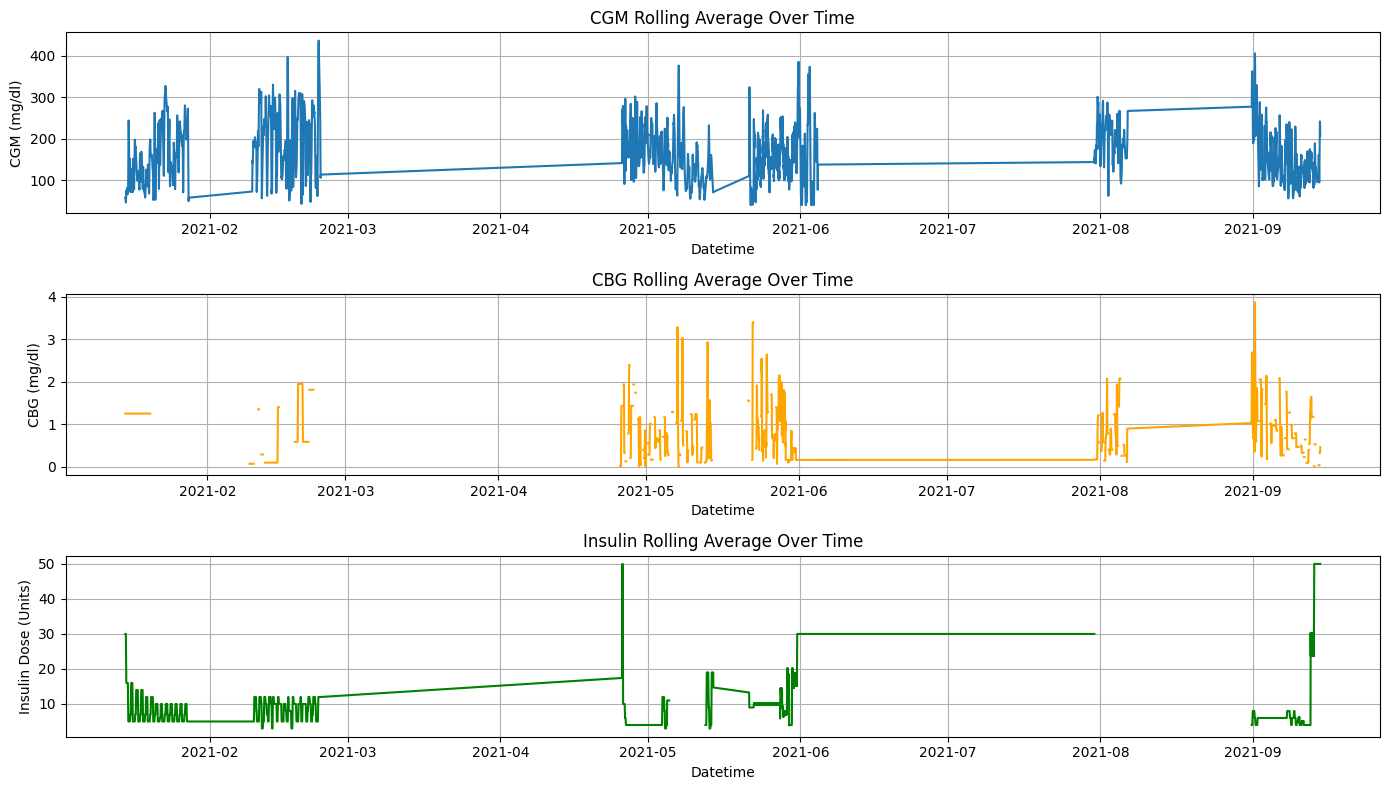

In [14]:
import matplotlib.pyplot as plt

# Plot the rolling averages for CGM, CBG, and Insulin dose over time
plt.figure(figsize=(14, 8))

# Plot CGM Rolling Average
plt.subplot(3, 1, 1)
plt.plot(data_sorted['Datetime'], data_sorted['CGM_rolling_avg'], label='CGM Rolling Avg')
plt.title('CGM Rolling Average Over Time')
plt.xlabel('Datetime')
plt.ylabel('CGM (mg/dl)')
plt.grid(True)

# Plot CBG Rolling Average
plt.subplot(3, 1, 2)
plt.plot(data_sorted['Datetime'], data_sorted['CBG_rolling_avg'], label='CBG Rolling Avg', color='orange')
plt.title('CBG Rolling Average Over Time')
plt.xlabel('Datetime')
plt.ylabel('CBG (mg/dl)')
plt.grid(True)

# Plot Insulin Rolling Average
plt.subplot(3, 1, 3)
plt.plot(data_sorted['Datetime'], data_sorted['Insulin_rolling_avg'], label='Insulin Rolling Avg', color='green')
plt.title('Insulin Rolling Average Over Time')
plt.xlabel('Datetime')
plt.ylabel('Insulin Dose (Units)')
plt.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


**Rolling averages untuk Metrik Waktu**

Plot di atas menampilkan rata-rata bergulir seiring waktu untuk metrik berikut:

- **Tingkat CGM** (Continuous Glucose Monitoring).
- **Tingkat CBG** (Capillary Blood Glucose).
- **Dosis Insulin** (subkutan).

**Observasi:**
- **Tingkat CGM dan CBG**: Tingkat ini berfluktuasi seiring waktu, dengan rata-rata bergulir yang memperhalus variasi jangka pendek.
- **Dosis Insulin**: Dosis insulin menunjukkan nilai yang relatif konsisten di seluruh periode waktu, yang menunjukkan bahwa dosis kemungkinan dicatat pada interval tertentu.

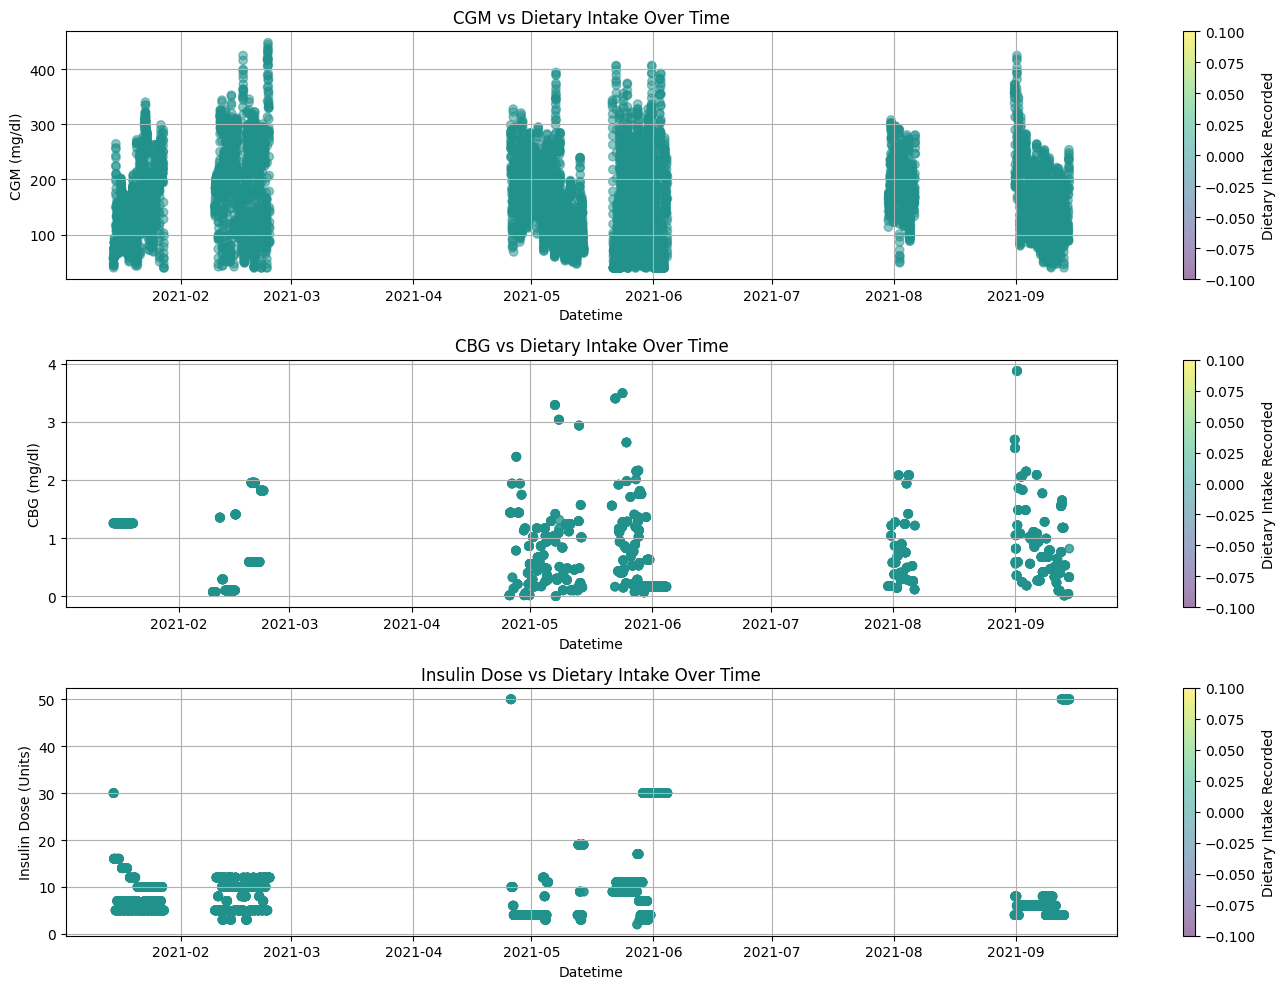

In [15]:
# Visualize dietary intake and its relationship with CGM, CBG, and Insulin over time

plt.figure(figsize=(14, 10))

# Plot CGM vs Dietary Intake
plt.subplot(3, 1, 1)
plt.scatter(data_sorted['Datetime'], data_sorted['CGM (mg / dl)'], c=data_sorted['Dietary intake'].notna(), cmap='viridis', alpha=0.5)
plt.title('CGM vs Dietary Intake Over Time')
plt.xlabel('Datetime')
plt.ylabel('CGM (mg/dl)')
plt.colorbar(label='Dietary Intake Recorded')
plt.grid(True)

# Plot CBG vs Dietary Intake
plt.subplot(3, 1, 2)
plt.scatter(data_sorted['Datetime'], data_sorted['CBG (mg / dl)'], c=data_sorted['Dietary intake'].notna(), cmap='viridis', alpha=0.5)
plt.title('CBG vs Dietary Intake Over Time')
plt.xlabel('Datetime')
plt.ylabel('CBG (mg/dl)')
plt.colorbar(label='Dietary Intake Recorded')
plt.grid(True)

# Plot Insulin vs Dietary Intake
plt.subplot(3, 1, 3)
plt.scatter(data_sorted['Datetime'], data_sorted['Insulin dose - s.c.'], c=data_sorted['Dietary intake'].notna(), cmap='viridis', alpha=0.5)
plt.title('Insulin Dose vs Dietary Intake Over Time')
plt.xlabel('Datetime')
plt.ylabel('Insulin Dose (Units)')
plt.colorbar(label='Dietary Intake Recorded')
plt.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


**Hubungan antara Asupan Diet, Tingkat Glukosa (CGM/CBG), dan Dosis Insulin**

Plot pencar di atas menunjukkan hubungan antara asupan diet, tingkat glukosa (CGM/CBG), dan dosis insulin seiring waktu:

**CGM vs Asupan Diet:**
- Plot pencar menunjukkan bagaimana tingkat CGM berfluktuasi sehubungan dengan asupan diet yang tercatat. Pita warna menunjukkan di mana data asupan diet tersedia, memudahkan untuk mengidentifikasi pola seputar waktu makan.

**CBG vs Asupan Diet:**
- Demikian pula, tingkat CBG dipetakan sehubungan dengan asupan diet. Tren tingkat glukosa sebelum dan setelah makan terlihat jelas, membantu mengidentifikasi potensi pengaruh makanan terhadap glukosa darah.

**Dosis Insulin vs Asupan Diet:**
- Dosis insulin dipetakan terhadap asupan diet yang tercatat, menunjukkan bagaimana tingkat insulin mungkin disesuaikan berdasarkan asupan makanan. Dosis yang lebih tinggi sering terlihat sekitar waktu makan.

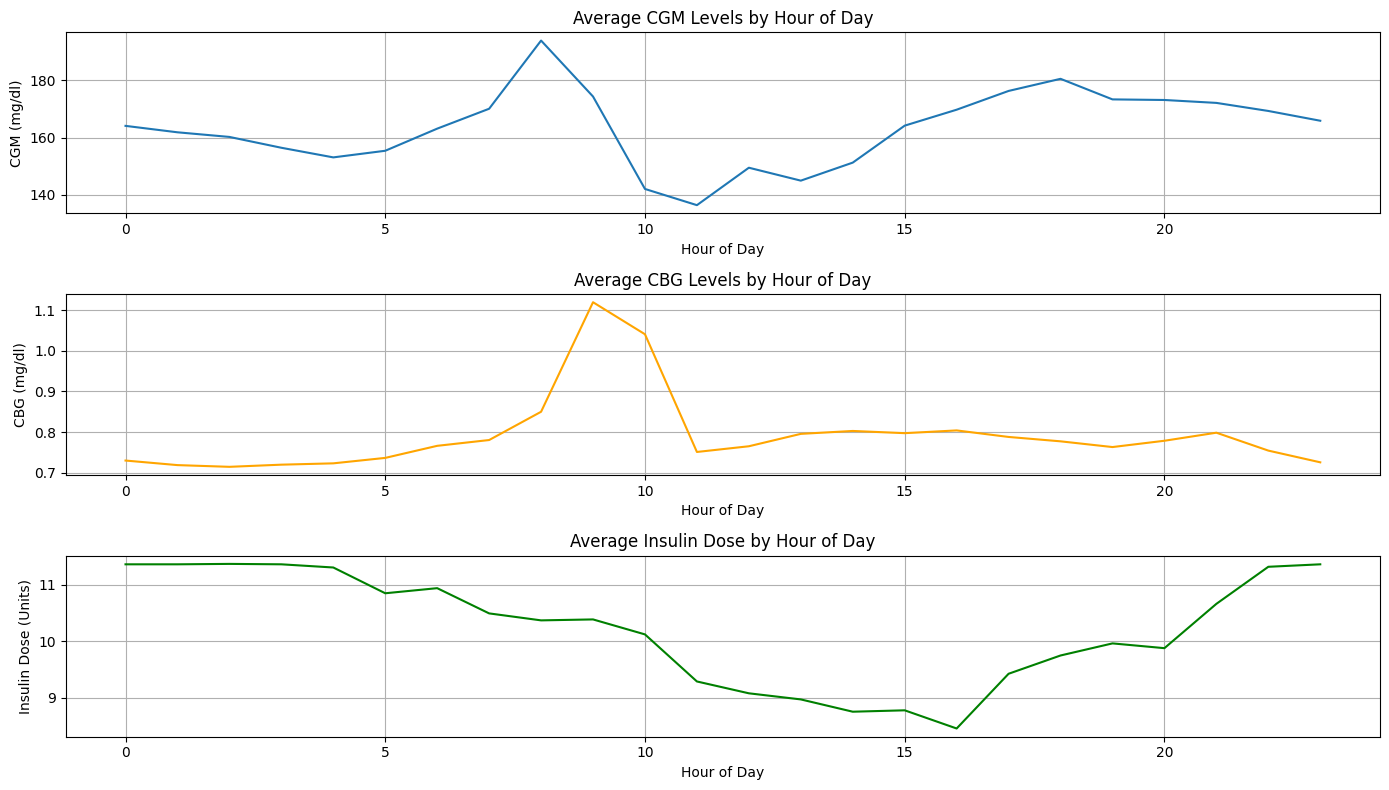

In [16]:
# Extract the hour of the day from the 'Datetime' column to analyze patterns over time
data_sorted['Hour_of_day'] = data_sorted['Datetime'].dt.hour

# Group the data by 'Hour_of_day' and calculate the mean values of CGM, CBG, and Insulin dose
hourly_data = data_sorted.groupby('Hour_of_day')[['CGM (mg / dl)', 'CBG (mg / dl)', 'Insulin dose - s.c.']].mean()

# Plot hourly analysis of CGM, CBG, and Insulin dose
plt.figure(figsize=(14, 8))

# Plot CGM levels by Hour of Day
plt.subplot(3, 1, 1)
plt.plot(hourly_data.index, hourly_data['CGM (mg / dl)'], label='Average CGM')
plt.title('Average CGM Levels by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('CGM (mg/dl)')
plt.grid(True)

# Plot CBG levels by Hour of Day
plt.subplot(3, 1, 2)
plt.plot(hourly_data.index, hourly_data['CBG (mg / dl)'], label='Average CBG', color='orange')
plt.title('Average CBG Levels by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('CBG (mg/dl)')
plt.grid(True)

# Plot Insulin doses by Hour of Day
plt.subplot(3, 1, 3)
plt.plot(hourly_data.index, hourly_data['Insulin dose - s.c.'], label='Average Insulin Dose', color='green')
plt.title('Average Insulin Dose by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Insulin Dose (Units)')
plt.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


**Rangkuman Rata-Rata Jam untuk CGM, CBG, dan Dosis Insulin**

Plot di atas menunjukkan rata-rata per jam untuk CGM, CBG, dan dosis insulin. Berikut adalah apa yang dapat kita amati:

**Tingkat CGM:**
- Terdapat fluktuasi yang signifikan dalam tingkat glukosa sepanjang hari, yang mungkin mencerminkan waktu makan, aktivitas fisik, atau faktor lainnya. Pola umum dapat membantu sistem rekomendasi memprediksi perilaku glukosa berdasarkan waktu dalam sehari.

**Tingkat CBG:**
- Tren yang serupa dengan CGM, dengan fluktuasi yang sesuai dengan kejadian harian. Informasi ini berguna untuk memahami dampak aktivitas harian dan makanan terhadap glukosa darah.

**Dosis Insulin:**
- Dosis insulin menunjukkan penyesuaian yang teratur, kemungkinan mencerminkan waktu makan atau periode peningkatan glukosa darah. Pola terkait waktu ini menunjukkan bahwa makanan memengaruhi dosis insulin, yang merupakan faktor kunci untuk personalisasi dalam sistem rekomendasi.

In [17]:
# Calculate the correlation matrix between CGM, CBG, Insulin dose, and Dietary intake
# For correlation calculation, we will encode 'Dietary intake' presence as binary (1 for present, 0 for missing)

data_sorted['Dietary intake_binary'] = data_sorted['Dietary intake'].notna().astype(int)

# Calculate correlation matrix
correlation_matrix = data_sorted[['CGM (mg / dl)', 'CBG (mg / dl)', 'Insulin dose - s.c.', 'Dietary intake_binary']].corr()

# Display the correlation matrix
correlation_matrix


,CGM (mg / dl),CBG (mg / dl),Insulin dose - s.c.,Dietary intake_binary
CGM (mg / dl),1.000000,0.077807,0.025586,0.020800
CBG (mg / dl),0.077807,1.000000,-0.029252,0.934080
Insulin dose - s.c.,0.025586,-0.029252,1.000000,-0.044877
Dietary intake_binary,0.020800,0.934080,-0.044877,1.000000


**Correlation Matrix menunjukkan beberapa key index berikut:**

- **CBG dan Asupan Diet**: Terdapat korelasi positif yang kuat (**0,93**) antara tingkat CBG dan keberadaan asupan diet. Ini menunjukkan bahwa ketika data asupan diet dicatat, tingkat CBG cenderung diukur dengan lebih andal atau memiliki hubungan langsung dengan asupan makanan.

- **CGM dan Asupan Diet**: Korelasi antara tingkat CGM dan asupan diet sangat rendah (**0,02**), menunjukkan bahwa CGM dan asupan diet mungkin tidak begitu terkait langsung dalam dataset ini atau bahwa penyesuaian waktu mungkin tidak menangkap pengaruh makanan terhadap tingkat glukosa dengan jelas.

- **Dosis Insulin dan Asupan Diet**: Korelasi antara dosis insulin dan asupan diet bersifat negatif tetapi lemah (**-0,04**). Ini bisa menunjukkan bahwa dosis insulin tidak terkait kuat dengan keberadaan sederhana dari catatan asupan diet, tetapi bisa dipengaruhi oleh banyak faktor lainnya.

**Insights**

- CBG menunjukkan korelasi yang sangat kuat dengan asupan diet, yang berarti itu bisa menjadi indikator kunci saat memberikan rekomendasi terkait makanan atau pengendalian glukosa.

- Korelasi yang lemah antara dosis insulin dan baik asupan diet maupun tingkat glukosa mungkin menunjukkan bahwa penyesuaian insulin didasarkan pada faktor lain, seperti instruksi medis atau pengujian yang lebih sering daripada hanya asupan makanan.

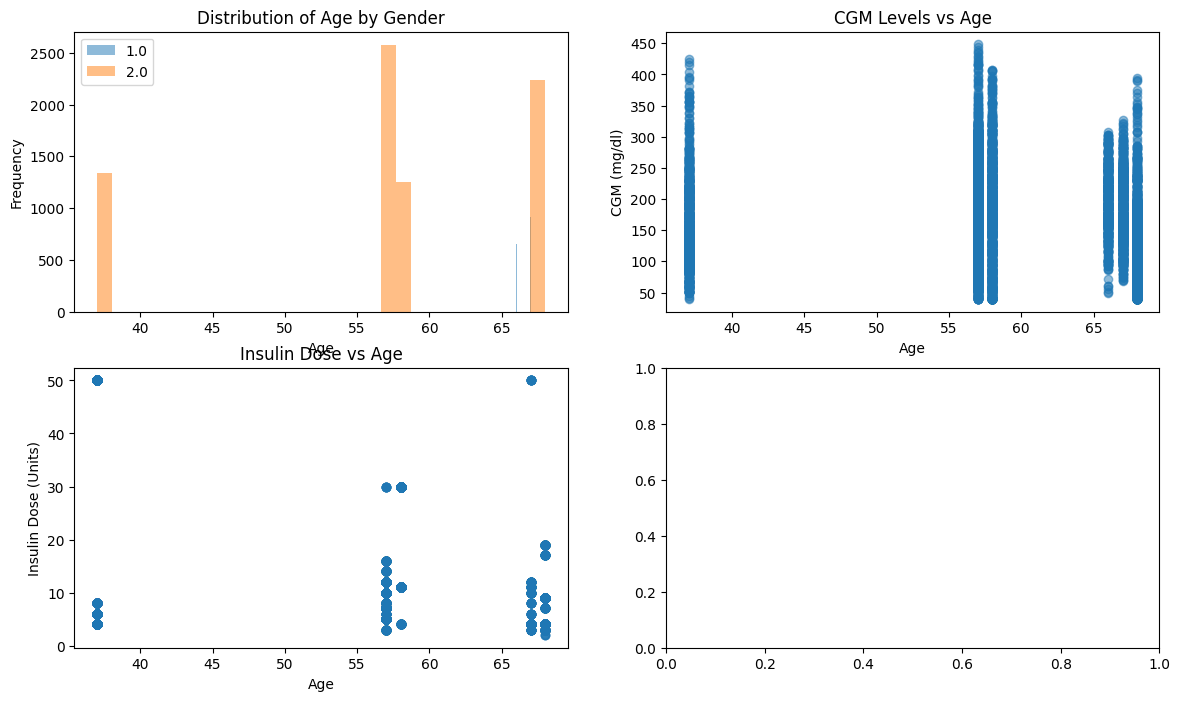

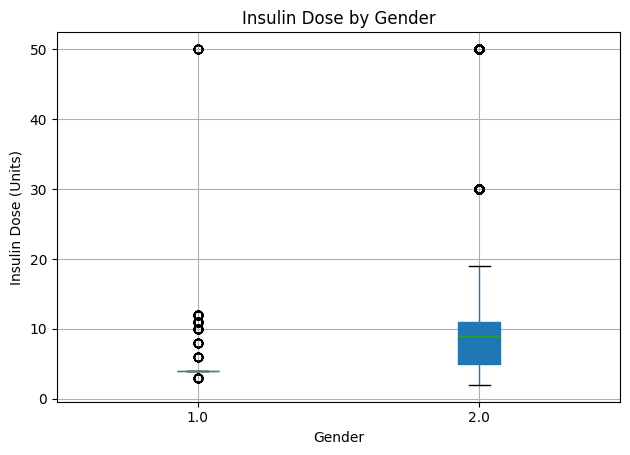

,Age (years),"Gender (Female=1, Male=2)",CGM (mg / dl),CBG (mg / dl),Insulin dose - s.c.
count,8983.000000,8983.000000,15695.000000,4818.000000,7736.000000
mean,58.579205,1.824669,164.753845,12.265157,10.178775
std,10.176845,0.380271,72.309923,50.211929,9.359195
min,37.000000,1.000000,39.600000,0.001013,2.000000
25%,57.000000,2.000000,108.000000,0.169363,5.000000
50%,58.000000,2.000000,156.600000,0.673333,7.000000
75%,67.000000,2.000000,214.200000,1.254348,11.000000
max,68.000000,2.000000,475.200000,466.200000,50.000000


In [18]:
# Correct the column names for Age and Gender, and re-run the summary and visualizations
age_gender_summary = data_sorted[['Age (years)', 'Gender (Female=1, Male=2)', 'CGM (mg / dl)', 'CBG (mg / dl)', 'Insulin dose - s.c.']].describe()

# Visualizing the distribution of Age and Insulin Dose by Gender
plt.figure(figsize=(14, 8))

# Distribution of Age by Gender
plt.subplot(2, 2, 1)
data_sorted.groupby('Gender (Female=1, Male=2)')['Age (years)'].plot(kind='hist', bins=30, alpha=0.5, legend=True)
plt.title('Distribution of Age by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')

# CGM vs Age
plt.subplot(2, 2, 2)
plt.scatter(data_sorted['Age (years)'], data_sorted['CGM (mg / dl)'], alpha=0.5)
plt.title('CGM Levels vs Age')
plt.xlabel('Age')
plt.ylabel('CGM (mg/dl)')

# Insulin dose vs Age
plt.subplot(2, 2, 3)
plt.scatter(data_sorted['Age (years)'], data_sorted['Insulin dose - s.c.'], alpha=0.5)
plt.title('Insulin Dose vs Age')
plt.xlabel('Age')
plt.ylabel('Insulin Dose (Units)')

# Insulin dose by Gender
plt.subplot(2, 2, 4)
data_sorted.boxplot(column='Insulin dose - s.c.', by='Gender (Female=1, Male=2)', patch_artist=True)
plt.title('Insulin Dose by Gender')
plt.suptitle('')  # Remove the default title generated by boxplot
plt.xlabel('Gender')
plt.ylabel('Insulin Dose (Units)')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Display summary statistics for Age, Gender, CGM, CBG, and Insulin dose
age_gender_summary


**Distribusi Usia dan Jenis Kelamin**

- **Usia**: Rentang usia dalam dataset ini adalah antara 37 hingga 68 tahun, dengan usia rata-rata 58 tahun.
- **Jenis Kelamin**: Distribusi jenis kelamin cukup seimbang, dengan lebih banyak laki-laki (dikonversi sebagai 2) dibandingkan perempuan (dikonversi sebagai 1).

**Tingkat Glukosa (CGM dan CBG)**

- **Tingkat CGM**: Tingkat CGM berkisar antara 39.6 mg/dl hingga 475.2 mg/dl, dengan rata-rata 164.75 mg/dl. Rentang ini menunjukkan fluktuasi yang signifikan dalam glukosa darah, yang mungkin disebabkan oleh variasi dalam diet, insulin, dan faktor lainnya.
- **Tingkat CBG**: Tingkat CBG menunjukkan rentang yang serupa, dari 0.001 hingga 466.2 mg/dl, dengan rata-rata yang jauh lebih kecil, yang mungkin menunjukkan konsentrasi di sekitar tingkat dasar, meskipun masih dengan variabilitas yang besar.

**Dosis Insulin**

- Dosis insulin memiliki rentang yang luas, dengan dosis rata-rata 10.18 unit. Dosis maksimum adalah 50 unit, dan dosis minimum adalah 2 unit, menunjukkan variasi dalam sensitivitas insulin di seluruh populasi.

In [19]:
# Check for duplicated patient entries and calculate the number of unique patients
unique_patients = data_sorted.groupby('Patient Number').agg({'Gender (Female=1, Male=2)': 'first', 'Age (years)': 'first'}).reset_index()

# Count the number of unique males and females
gender_distribution = unique_patients['Gender (Female=1, Male=2)'].value_counts()

# Get unique age distribution
age_distribution = unique_patients['Age (years)'].describe()

gender_distribution, age_distribution


(Gender (Female=1, Male=2)
 2.0    7
 1.0    2
 Name: count, dtype: int64,
 count     9.000000
 mean     60.666667
 std      10.148892
 min      37.000000
 25%      57.000000
 50%      66.000000
 75%      68.000000
 max      68.000000
 Name: Age (years), dtype: float64)

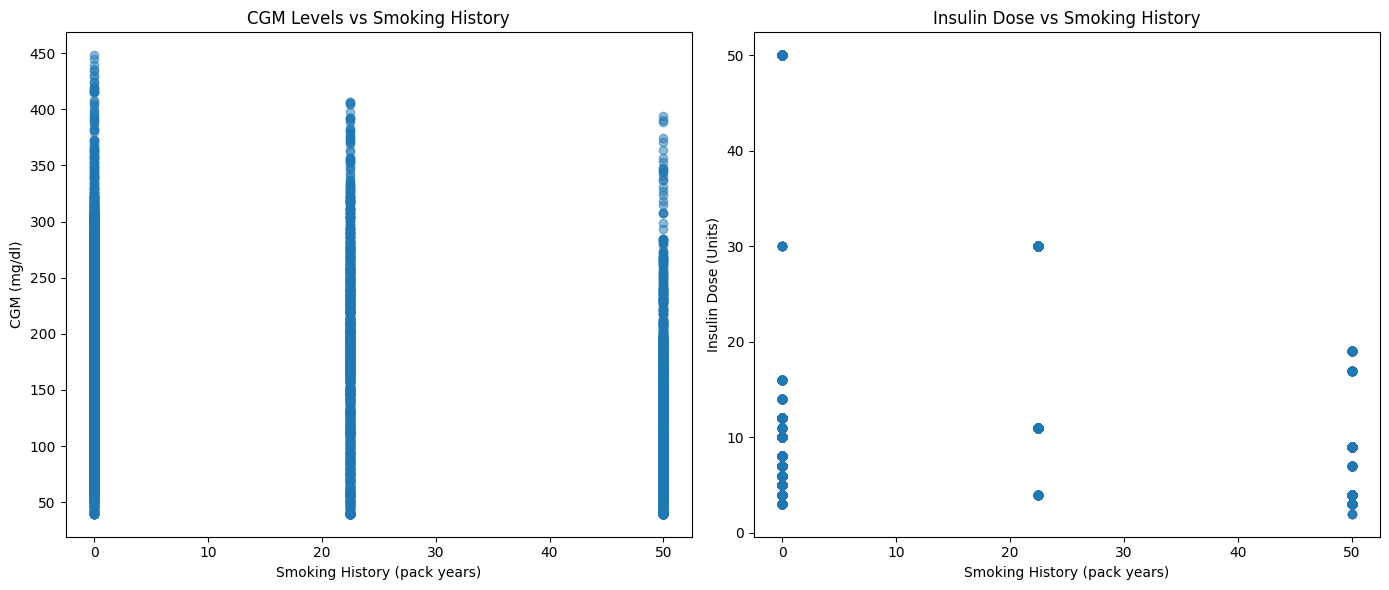

(       Smoking History (pack year)  CGM (mg / dl)  CBG (mg / dl)  \
 count                  8983.000000   15695.000000    4818.000000   
 mean                     15.602805     164.753845      12.265157   
 std                      21.218611      72.309923      50.211929   
 min                       0.000000      39.600000       0.001013   
 25%                       0.000000     108.000000       0.169363   
 50%                       0.000000     156.600000       0.673333   
 75%                      22.500000     214.200000       1.254348   
 max                      50.000000     475.200000     466.200000   
 
        Insulin dose - s.c.  
 count          7736.000000  
 mean             10.178775  
 std               9.359195  
 min               2.000000  
 25%               5.000000  
 50%               7.000000  
 75%              11.000000  
 max              50.000000  ,
                              Smoking History (pack year)  CGM (mg / dl)  \
 Smoking History (pack year)  

In [20]:
# Analyze smoking history and its relation to medical data (CGM, CBG, Insulin Dose)
# We'll check the correlation between smoking history (pack years) and the medical metrics.

# First, let's check the basic stats of the 'Smoking History (pack year)' and categorize alcohol data
smoking_alcohol_stats = data_sorted[['Smoking History (pack year)', 'Alcohol Drinking History (drinker/non-drinker)', 
                                     'CGM (mg / dl)', 'CBG (mg / dl)', 'Insulin dose - s.c.']].describe()

# Correlation of smoking history with medical data (CGM, CBG, Insulin dose)
smoking_correlation = data_sorted[['Smoking History (pack year)', 'CGM (mg / dl)', 'CBG (mg / dl)', 'Insulin dose - s.c.']].corr()

# Comparing insulin dose and smoking history visually
plt.figure(figsize=(14, 6))

# Scatter plot of Smoking History vs CGM
plt.subplot(1, 2, 1)
plt.scatter(data_sorted['Smoking History (pack year)'], data_sorted['CGM (mg / dl)'], alpha=0.5)
plt.title('CGM Levels vs Smoking History')
plt.xlabel('Smoking History (pack years)')
plt.ylabel('CGM (mg/dl)')

# Scatter plot of Smoking History vs Insulin Dose
plt.subplot(1, 2, 2)
plt.scatter(data_sorted['Smoking History (pack year)'], data_sorted['Insulin dose - s.c.'], alpha=0.5)
plt.title('Insulin Dose vs Smoking History')
plt.xlabel('Smoking History (pack years)')
plt.ylabel('Insulin Dose (Units)')

plt.tight_layout()
plt.show()

# Display the stats and correlation results
smoking_alcohol_stats, smoking_correlation


**Riwayat Merokok**

- **Rata-Rata Riwayat Merokok**: Rata-rata riwayat merokok (tahun paket) adalah 15.6 tahun, dengan rentang dari 0 hingga 50 tahun. Deviasi standar yang besar (21.2) menunjukkan variasi yang signifikan di antara pasien.

**Korelasi**

- **Merokok dan CGM**: Korelasi antara riwayat merokok dan tingkat CGM adalah -0.28, menunjukkan hubungan negatif yang lemah. Ini menunjukkan bahwa riwayat merokok yang lebih tinggi mungkin terkait dengan tingkat CGM yang lebih rendah, tetapi efeknya tidak terlalu kuat.
- **Merokok dan CBG**: Korelasi sangat lemah (-0.05), menunjukkan hampir tidak ada hubungan.
- **Merokok dan Dosis Insulin**: Korelasi dengan dosis insulin juga lemah (0.02), menunjukkan bahwa riwayat merokok tidak berpengaruh kuat terhadap dosis insulin.

**Visualisasi**

- **Scatter Plot Riwayat Merokok vs Tingkat CGM**: Menunjukkan beberapa variabilitas, tetapi tidak ada pola yang jelas. Ini mendukung korelasi lemah yang ditemukan.
- **Scatter Plot Riwayat Merokok vs Dosis Insulin**: Juga menunjukkan hubungan minimal, memperkuat nilai korelasi yang lemah.

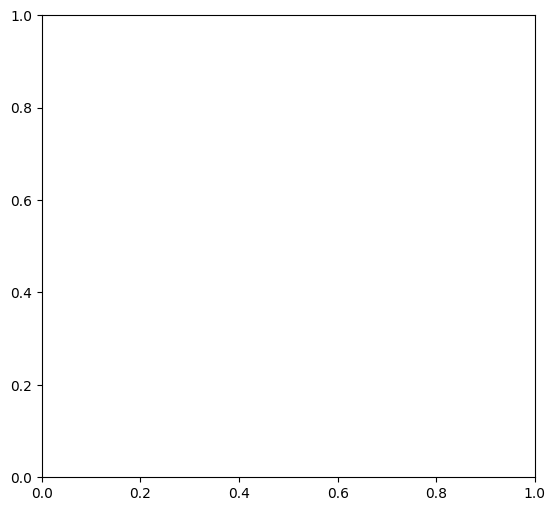

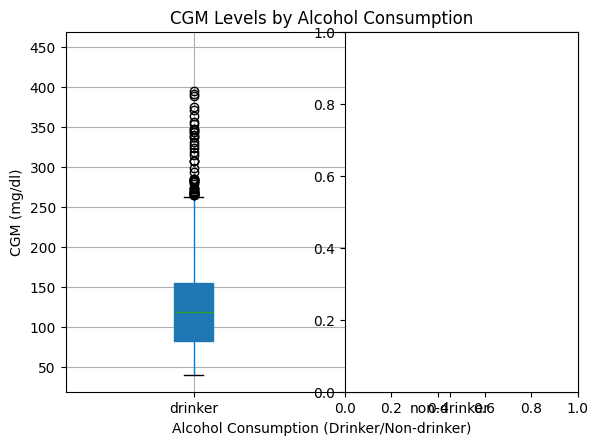

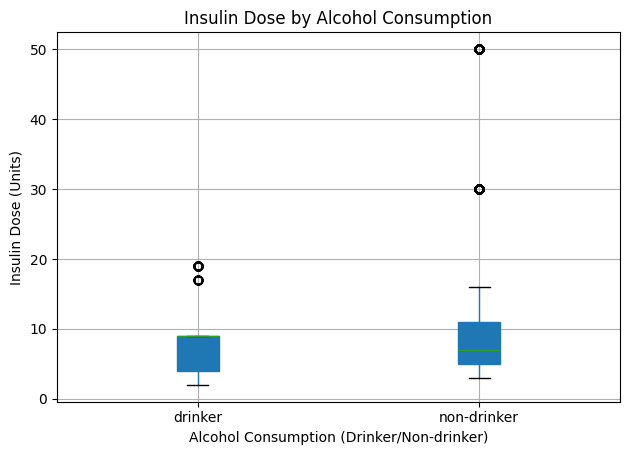

CGM (mg / dl)              \
                                                       count        mean   
Alcohol Drinking History (drinker/non-drinker)                             
drinker                                               2238.0  124.876408   
non-drinker                                           6745.0  176.193447   

                                                                               \
                                                      std   min    25%    50%   
Alcohol Drinking History (drinker/non-drinker)                                  
drinker                                         55.819204  39.6   82.8  118.8   
non-drinker                                     73.375650  39.6  118.8  171.0   

                                                             CBG (mg / dl)  \
                                                  75%    max         count   
Alcohol Drinking History (drinker/non-drinker)                               
drinker                                         154.8  394.2        1053.0   
non-drinker                                     228.6  448.2        3493.0   

                                                          ...            \
                                                    mean  ...       75%   
Alcohol Drinking History (drinker/non-drinker)            ...             
drinker                                         0.862760  ...  1.239784   
non-drinker                                     0.772986  ...  1.254348   

                                                         Insulin dose - s.c.  \
                                                     max               count   
Alcohol Drinking History (drinker/non-drinker)                                 
drinker                                         3.287548              1446.0   
non-drinker                                     3.873333              6087.0   

                                                                           \
                                                     mean        std  min   
Alcohol Drinking History (drinker/non-drinker)                              
drinker                                          7.304288   4.057213  2.0   
non-drinker                                     10.947429  10.209900  3.0   

                                                                      
                                                25%  50%   75%   max  
Alcohol Drinking History (drinker/non-drinker)                        
drinker                                         4.0  9.0   9.0  19.0  
non-drinker                                     5.0  7.0  11.0  50.0  

[2 rows x 24 columns]

In [21]:
# Analyze alcohol consumption and its relation to medical data (CGM, CBG, Insulin Dose)
# Comparing the alcohol drinking history (drinker vs non-drinker) with the medical metrics.

# Check alcohol consumption distribution
alcohol_cgm_stats = data_sorted.groupby('Alcohol Drinking History (drinker/non-drinker)')[
    ['CGM (mg / dl)', 'CBG (mg / dl)', 'Insulin dose - s.c.']].describe()

# Visualizing the relationship between alcohol consumption and key metrics
plt.figure(figsize=(14, 6))

# Boxplot of CGM by alcohol consumption (drinker vs non-drinker)
plt.subplot(1, 2, 1)
data_sorted.boxplot(column='CGM (mg / dl)', by='Alcohol Drinking History (drinker/non-drinker)', patch_artist=True)
plt.title('CGM Levels by Alcohol Consumption')
plt.suptitle('')
plt.xlabel('Alcohol Consumption (Drinker/Non-drinker)')
plt.ylabel('CGM (mg/dl)')

# Boxplot of Insulin Dose by alcohol consumption (drinker vs non-drinker)
plt.subplot(1, 2, 2)
data_sorted.boxplot(column='Insulin dose - s.c.', by='Alcohol Drinking History (drinker/non-drinker)', patch_artist=True)
plt.title('Insulin Dose by Alcohol Consumption')
plt.suptitle('')
plt.xlabel('Alcohol Consumption (Drinker/Non-drinker)')
plt.ylabel('Insulin Dose (Units)')

plt.tight_layout()
plt.show()

# Displaying statistical summary of alcohol consumption and its medical relationship
alcohol_cgm_stats


**Konsumsi Alkohol**

- **Jumlah Pengguna Alkohol**: Terdapat 2,238 peminum dan 6,745 bukan peminum dalam dataset.

**Tingkat CGM**

- **Peminum**: Memiliki rata-rata CGM sebesar 124.88 mg/dl, dengan rentang yang lebih rendah (39.6 hingga 118.8 mg/dl).
- **Bukan Peminum**: Memiliki rata-rata CGM sebesar 176.19 mg/dl, dengan rentang yang lebih tinggi (39.6 hingga 171.0 mg/dl).
- Ini menunjukkan bahwa bukan peminum umumnya memiliki tingkat CGM yang lebih tinggi.

**Tingkat CBG**

- **Peminum**: Memiliki rata-rata CBG sebesar 0.86 mg/dl, sementara bukan peminum memiliki rata-rata sedikit lebih tinggi yaitu 0.77 mg/dl.

**Dosis Insulin**

- **Peminum**: Menggunakan rata-rata 7.30 unit insulin (rentang 2.0 hingga 19.0).
- **Bukan Peminum**: Menggunakan rata-rata 10.95 unit insulin (rentang 3.0 hingga 50.0).
- Bukan peminum umumnya memerlukan dosis insulin yang lebih tinggi, menunjukkan resistensi insulin yang lebih besar atau respons yang berbeda terhadap pengobatan.

**Wawasan Visual**

- Tingkat CGM dan dosis insulin jelas terbedakan antara peminum dan bukan peminum, dengan bukan peminum umumnya memiliki tingkat glukosa yang lebih tinggi dan memerlukan lebih banyak insulin.
- Boxplot menunjukkan variabilitas yang jelas dalam dosis insulin untuk kedua kelompok, dengan bukan peminum memerlukan rentang dosis yang lebih luas.

**Kesimpulan**

Konsumsi alkohol tampaknya memiliki hubungan potensial dengan pengendalian glukosa dan dosis insulin. Bukan peminum tampaknya memiliki tingkat glukosa yang lebih tinggi dan cenderung menggunakan lebih banyak insulin. 
Hubungan ini mungkin penting untuk memberikan rekomendasi yang dipersonalisasi dalam manajemen diabetes.

## Modelling and Evaluation


## Model 1 --> Advanced Neural Network 

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras import layers, models, callbacks

2024-12-01 19:11:51.384489: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# # Preprocess the data
# # Assuming the dataframe 'data_sorted' is already loaded with the necessary features and targets


# features = ['Age (years)', 'Gender (Female=1, Male=2)', 'Smoking History (pack year)', 
#             'Alcohol Drinking History (drinker/non-drinker)', 'Insulin dose - s.c.']
# targets = ['CGM (mg / dl)', 'CBG (mg / dl)', 'Insulin dose - s.c.']

In [ ]:
# Encode categorical columns

# label_encoder = LabelEncoder()
# data_sorted['Alcohol Drinking History (drinker/non-drinker)'] = label_encoder.fit_transform(data_sorted['Alcohol Drinking History (drinker/non-drinker)'])
# data_sorted['Gender (Female=1, Male=2)'] = label_encoder.fit_transform(data_sorted['Gender (Female=1, Male=2)'])

In [ ]:
# Drop missing values

# data_model = data_sorted[features + targets].dropna()

In [ ]:

# Split into features (X) and target (y)

# X = data_model[features]
# y = data_model[targets]


In [ ]:
# Split into training and testing datasets (80% train, 20% test)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [ ]:
# def build_model(input_dim):
#     model = models.Sequential()

#     # Input layer (specify the input shape correctly)
#     model.add(layers.InputLayer(input_shape=(input_dim,)))

#     # Hidden layers
#     model.add(layers.Dense(256, activation='relu'))
#     model.add(layers.BatchNormalization())
    
#     model.add(layers.Dense(128, activation='relu'))
#     model.add(layers.BatchNormalization())
    
#     model.add(layers.Dense(64, activation='relu'))
#     model.add(layers.BatchNormalization())
#     model.add(layers.Dropout(0.5))

#     # Output layer for multi-output regression (CGM, CBG, Insulin)
#     model.add(layers.Dense(4, activation='linear'))  # 3 outputs for CGM, CBG, and Insulin dose

#     # Compile the model
#     model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    
#     return model


In [ ]:
# Build the model
# input_dim = X_train_scaled.shape[1]
# model = build_model(input_dim)

/Users/Yersolid/.pyenv/versions/3.11.7/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
# # Callbacks for early stopping and learning rate decay
# early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# lr_scheduler = callbacks.LearningRateScheduler(lambda epoch: 0.001 * 0.9 ** epoch)

In [ ]:
# print(y_train.columns)

Index(['CGM (mg / dl)', 'CBG (mg / dl)', 'Insulin dose - s.c.',
       'Insulin dose - s.c.'],
      dtype='object')


In [ ]:
# Train the model
# history = model.fit(X_train_scaled, y_train, epochs=250, batch_size=32, validation_split=0.2,verbose=1)

Epoch 1/250
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1355.2931 - mae: 16.4292 - val_loss: 1267.7594 - val_mae: 15.0740
Epoch 2/250
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1475.8395 - mae: 17.2808 - val_loss: 1268.7319 - val_mae: 15.0693
Epoch 3/250
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1473.1024 - mae: 17.1769 - val_loss: 1268.5439 - val_mae: 15.0706
Epoch 4/250
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1370.2850 - mae: 16.6721 - val_loss: 1267.7914 - val_mae: 15.0572
Epoch 5/250
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1369.5475 - mae: 16.6380 - val_loss: 1270.2428 - val_mae: 15.0835
Epoch 6/250
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1356.2430 - mae: 16.3538 - val_loss: 1271.7134 - val_mae: 15.0953
Epoch 7/250
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1434.5740 - mae: 17.0896 - val_loss: 1268.7161 - val_mae: 15.0745
Epoch 8/250
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1467.5710 - mae: 17.2093 - val_loss: 1269.6650 - val_mae: 15.0837


In [ ]:
# Make predictions on the test set
# y_pred = model.predict(X_test_scaled)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [ ]:
# # Evaluate the model's performance
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# mae, r2

(14.517678051940969, 0.5350501537322998)

## Model 2 --> LSTM

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

2024-12-01 20:10:50.345847: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
# Checking for missing values
missing_values = data_sorted.isnull().sum()
missing_values[missing_values > 0]  # Only show columns with missing values


CBG (mg / dl)                                             10877
Blood Ketone (mmol / L)                                    7453
Dietary intake                                             8992
饮食                                                         6491
Insulin dose - s.c.                                        7959
Non-insulin hypoglycemic agents                            7152
CSII - bolus insulin (Novolin R, IU)                       6644
CSII - basal insulin (Novolin R, IU / H)                   6593
Insulin dose - i.v.                                        7462
Gender (Female=1, Male=2)                                  6712
Age (years)                                                6712
Height (m)                                                 6712
Weight (kg)                                                6712
BMI (kg/m2)                                                6712
Smoking History (pack year)                                6712
Alcohol Drinking History (drinker/non-dr

In [27]:
import re
# Menentukan fitur yang relevan
features = ['CGM (mg / dl)', 'CBG (mg / dl)', 'Insulin dose - s.c.', 'Dietary intake', 'hour_of_day', 'day_of_week']
# Fungsi untuk mengekstrak nilai gram dari kolom 'Dietary intake'
def extract_grams(text):
    # Mencari angka yang diikuti dengan 'g', tanpa menghiraukan spasi
    grams = re.findall(r'(\d+)\s?g', text)  # Mengambil angka yang diikuti dengan 'g'
    grams_values = [int(g) for g in grams]  # Mengubah angka menjadi integer
    return sum(grams_values) if grams_values else 0  # Jika ada nilai gram, jumlahkan, jika tidak, beri 0

# Terapkan fungsi ekstraksi pada kolom 'Dietary intake'
data_sorted['Dietary intake'] = data_sorted['Dietary intake'].apply(lambda x: extract_grams(str(x)))

# Mengganti missing values menggunakan interpolasi linier dan forward fill
df_interpolated = data_sorted[features].copy()

# Menggunakan interpolasi linier untuk mengisi nilai yang hilang pada dataset
df_interpolated = df_interpolated.interpolate(method='linear', axis=0, limit_direction='both')

# Menggunakan forward fill untuk mengisi nilai yang hilang
df_interpolated = df_interpolated.fillna(method='ffill')

# Menormalisasi data numerik
scaler = MinMaxScaler()
df_scaled = df_interpolated.copy()
df_scaled[features] = scaler.fit_transform(df_interpolated[features])

/var/folders/3n/7sqpd9fs6hj255clf3l1q_340000gp/T/ipykernel_41581/1496228542.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_interpolated = df_interpolated.fillna(method='ffill')


In [28]:
sequence_length = 30



def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length, 0])  # Menggunakan 'CGM (mg / dl)' sebagai label (target)
    
    return np.array(sequences), np.array(labels)

In [29]:
# Mengambil hanya kolom yang akan digunakan dalam urutan (kita pilih hanya kolom pertama sebagai target untuk prediksi CGM)
data_values = df_scaled[features].values

# Membuat urutan data untuk model LSTM
X, y = create_sequences(data_values, sequence_length)

# Membagi data menjadi training dan testing (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [30]:
# Membangun model LSTM menggunakan TensorFlow
model = Sequential()

# Menambahkan lapisan LSTM
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Menambahkan Dropout untuk mengurangi overfitting

# Menambahkan lapisan LSTM kedua
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Menambahkan lapisan Dense untuk output
model.add(Dense(units=1))  # Output tunggal untuk prediksi CGM (mg/dl)

# Mengkompilasi model
model.compile(optimizer=Adam(), loss='mean_squared_error')


/Users/Yersolid/.pyenv/versions/3.11.7/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 50)         │        11,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,651 (123.64 KB)

 Trainable params: 31,651 (123.64 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Melatih model
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
392/392 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0014 - val_loss: 9.9245e-04
Epoch 2/30
392/392 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0013 - val_loss: 9.4510e-04
Epoch 3/30
392/392 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 4/30
392/392 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 5/30
392/392 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0013 - val_loss: 8.5743e-04
Epoch 6/30
392/392 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0013 - val_loss: 8.6603e-04
Epoch 7/30
392/392 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.0011 - val_loss: 8.9613e-04
Epoch 8/30
392/392 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0013 - val_loss: 8.2223e-04
Epoch 9/30
392/392 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0012 - val_loss: 8.4902e-04
Epoch 10/30
392/392 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0012 - val_loss: 7.8868e-04
Epoch 11/30
392/392 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0012 - val_loss: 8.4269e-04
Epoch

In [36]:
# Evaluasi model
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")


98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.1096e-04
Test Loss: 0.0007567816646769643


98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Mean Absolute Error (MAE): 0.01766338241033081
Mean Squared Error (MSE): 0.0007567813908248949
R2 Score: 0.9687103274650536


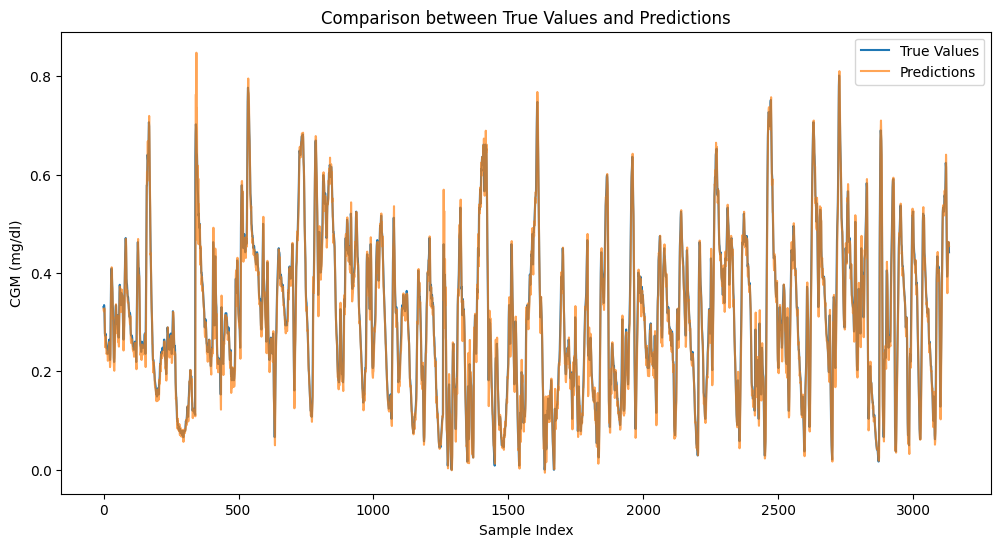

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prediksi dengan model pada data uji
y_pred = model.predict(X_test)

# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Menghitung R2 Score (Koefisien Determinasi)
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

# Visualisasi hasil prediksi dan nilai sebenarnya
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='True Values')
plt.plot(y_pred, label='Predictions', alpha=0.7)
plt.legend()
plt.title("Comparison between True Values and Predictions")
plt.xlabel("Sample Index")
plt.ylabel("CGM (mg/dl)")
plt.show()


In [39]:
model.save('diabetes_reccomendation_model.h5')

In [ ]:
# from tensorflow.keras.layers import LSTM, Dense, Dropout
# from tensorflow.keras import layers, models

# def build_lstm_model(input_shape):
#     model = models.Sequential()
    
#     # First LSTM layer
#     model.add(layers.LSTM(128, activation='relu', input_shape=input_shape, return_sequences=True))
#     model.add(layers.Dropout(0.2))
    
#     # Second LSTM layer
#     model.add(layers.LSTM(64, activation='relu', return_sequences=False))
#     model.add(layers.Dropout(0.2))
    
#     # Dense layer for output
#     model.add(layers.Dense(1))  # Since we're predicting a single continuous value
    
#     # Compile the model
#     model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    
#     return model



In [ ]:
# # Build the model with input shape
# lstm_model = build_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]))



/Users/Yersolid/.pyenv/versions/3.11.7/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# # Summary of the model
# lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 10, 128)        │        91,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 140,609 (549.25 KB)

 Trainable params: 140,609 (549.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# # Set up EarlyStopping and ModelCheckpoint callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)




In [ ]:
# # Train the model with callbacks
# history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),
#                          callbacks=[early_stopping], verbose=1)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [ ]:

# # Evaluate the model's performance
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.legend()
# plt.show()